In [1]:
#tensorlfow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from math import sqrt
from scipy.stats import truncnorm

# modules
from Ops.spectral_normalization import SpectralConv2D, SpectralDense
from Ops.ops import ResnetBlock, ResnetBlockUp, ResnetBlockDown
from Ops.attention import Attention
from Ops.global_sum_pooling import GlobalSumPooling2D
from Ops.conditional_batch_normalization import ConditionalBatchNormalization

In [3]:
# generate points in latent space as input for the generator
# n_sanples  should be a power of self.n_classes
def generate_latent_points_all_classes(latent_dim, n_samples):
    # generate points in the latent space
    z_input = np.random.randn(n_samples, latent_dim)
    z_input = z_input.reshape(n_samples, latent_dim)
    # generate labels
    n = int(sqrt(n_samples))
    labels = np.asarray([c for c in range(n) for _ in range(n)])
    return [z_input, labels]

def generate_latent_points_all_classes_biggan(latent_dim, n_samples):
    # generate points in the latent space
    z_input = truncnorm.rvs(-2, 2, size=(n_samples, 128), random_state=None).astype(np.float32)
    z_input = z_input * 2.0
    # generate labels
    n = int(sqrt(n_samples))
    labels = np.asarray([c for c in range(n) for _ in range(n)])
    return [z_input, labels]

# create and save a plot of generated images
def show_plot(examples):
    # plot images
    fig = plt.figure(figsize=(16., 16.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(10, 10),  # creates 4x4 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )

    for ax, im in zip(grid, examples):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.axis('off')
    plt.show()

In [3]:
generator = './history/acgan/acgan-cifar10-10/training_checkpoints/generator-e200.h5'
generator = tf.keras.models.load_model(generator)

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [40]:
latent_points, labels = generate_latent_points_all_classes(110,100)
X = generator.predict([latent_points, labels])
X = (X+1) / 2

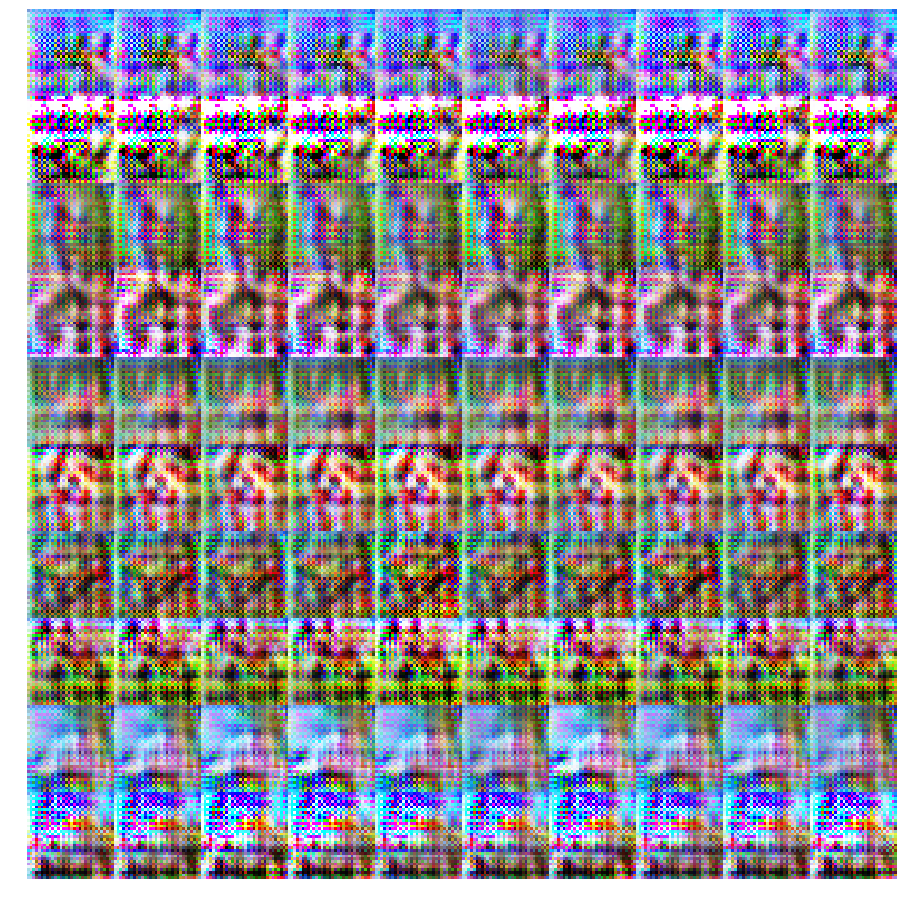

In [35]:
show_plot(X)

In [3]:
generator = './history/acgan/acgan-cifar10-12/training_checkpoints/generator-e246.h5'
generator = tf.keras.models.load_model(generator)

In [7]:
latent_points, labels = generate_latent_points_all_classes(110,100)
X = generator.predict([latent_points, labels])
X = (X+1) / 2

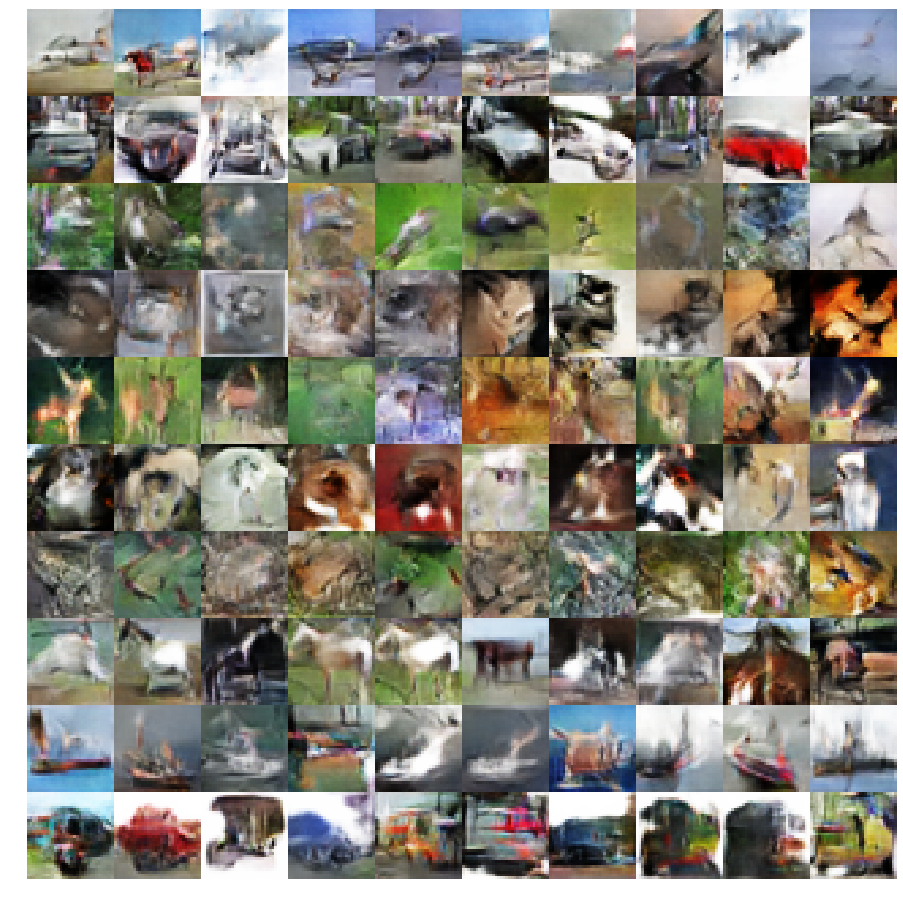

In [8]:
show_plot(X)

In [4]:
custom_objects={'SpectralDense': SpectralDense, 'SpectralConv2D': SpectralConv2D}
generator = './history/bigacgan/bigacgan-cifar10-2/training_checkpoints/generator-e224.h5'
generator = tf.keras.models.load_model(generator, custom_objects=custom_objects)

In [13]:
latent_points, labels = generate_latent_points_all_classes_biggan(128,100)
X = generator.predict([latent_points, labels])
X = (X+1) / 2

In [ ]:
show_plot(X)

In [3]:
generator = './history/acgan/acgan-cifar10-1/training_checkpoints/generator-e200.h5'
generator = tf.keras.models.load_model(generator)

In [6]:
latent_points, labels = generate_latent_points_all_classes(100,100)
X = generator.predict([latent_points, labels])
X = (X+1) / 2

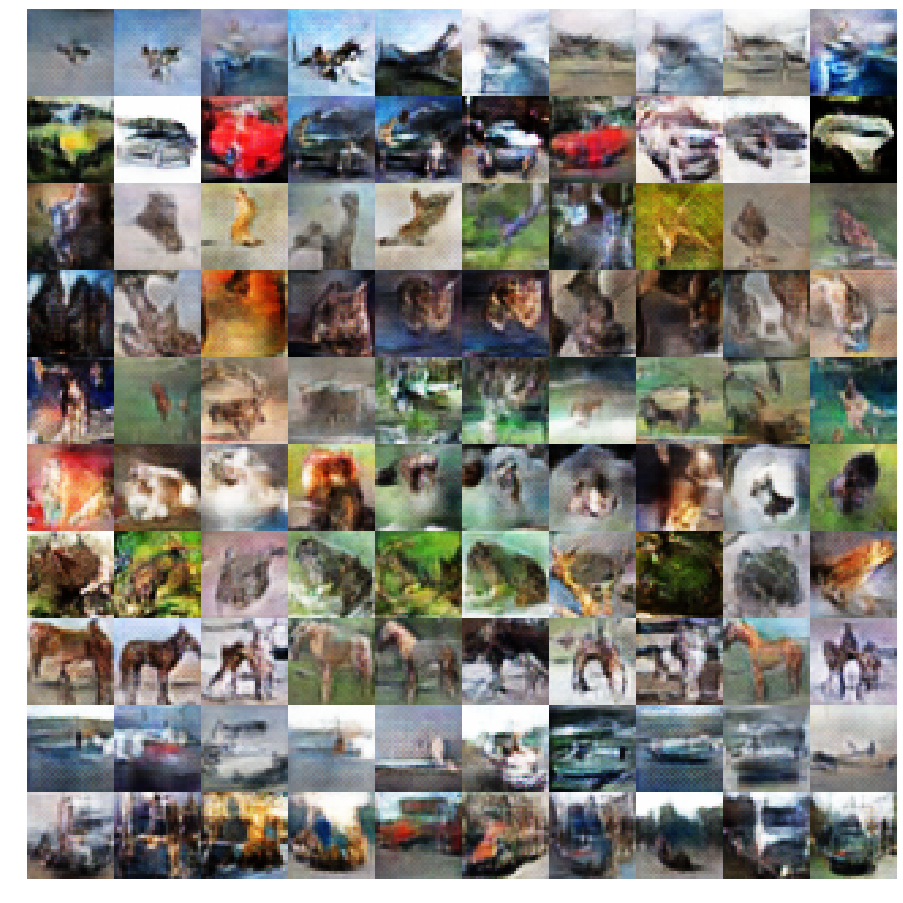

In [7]:
show_plot(X)